# Домашнее задание к лекции «Задачи классификации и кластеризации»

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [3]:
iris = load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data = data[['sepal length (cm)', 'sepal width (cm)']]
data_class = iris.target
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


## Классификация

In [6]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [7]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
lda = LinearDiscriminantAnalysis()

In [9]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [10]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 1, 2, 2, 0,
       0, 2, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1])

In [11]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,2,1
1,0,0
2,0,0
3,0,0
4,2,1
5,2,2
6,1,1
7,2,2
8,0,0
9,0,0


In [12]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7105263157894737

<ipython-input-13-722df65563e2>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


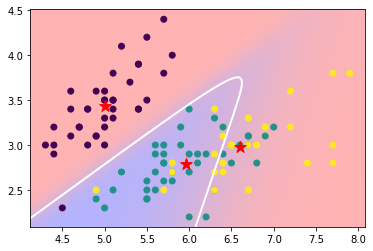

In [13]:
# сам scatter plot
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

## Кластеризация

In [23]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X_train)

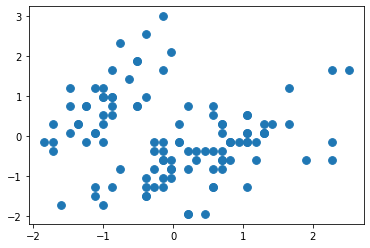

In [17]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', s=60)

In [18]:
from sklearn.cluster import KMeans

In [19]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

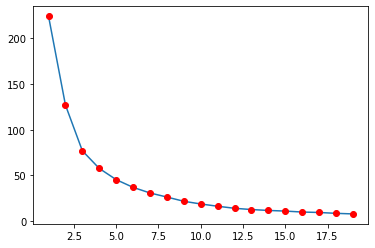

In [20]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [21]:
# оптимальное количество кластеров 3 судя по графику локтя
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 2, 2, 2, 0, 0,
       2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 0, 1,
       1, 1, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2,
       2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0,
       1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1,
       2, 2], dtype=int32)

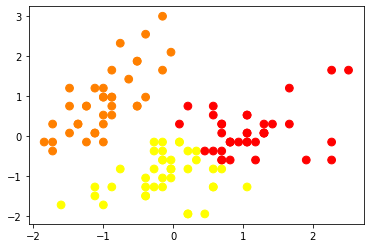

In [22]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)